In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 3)  # (width, height) in inches
from mzsql import *

/home/wkumler/miniconda3/envs/mzsql/lib/python3.12/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


## Manually convert the mzML file to an mzMLb file using the Proteowizard GUI
It doesn't seem like msconvert supports mzMLb conversion via command line (yet)

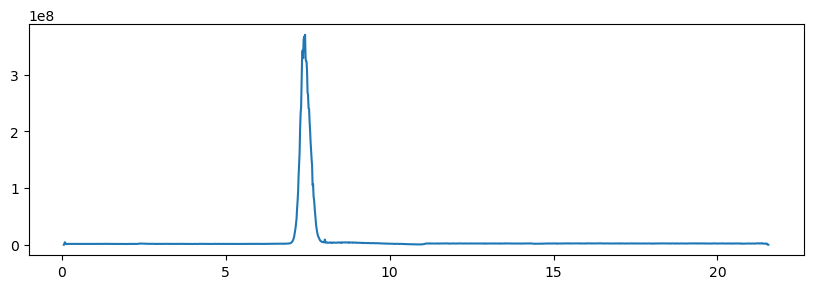

In [3]:
chrom_data = get_chrom_mzmlb('../demo_data/180205_Poo_TruePoo_Full1.mzMLb', 118.0865, 10)
plt.plot(chrom_data["rt"], chrom_data["int"])

<StemContainer object of 3 artists>

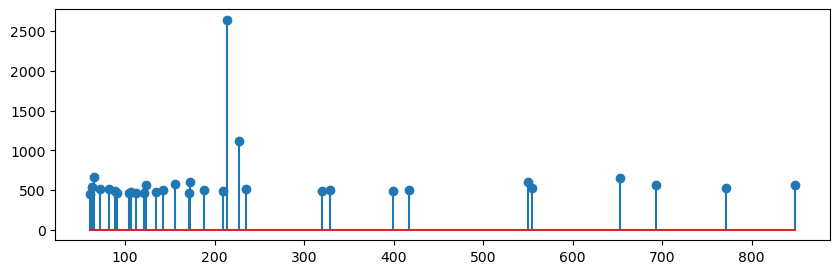

In [6]:
spec_data = get_spec_mzmlb("../demo_data/180205_Poo_TruePoo_Full1.mzMLb", 1)
plt.stem(spec_data["mz"], spec_data["int"])

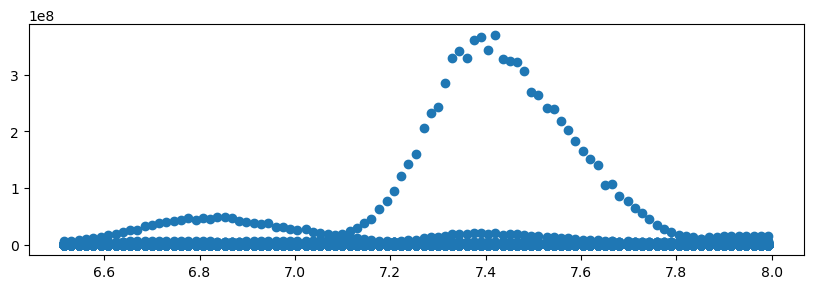

In [8]:
rtrange_data = get_rtrange_mzmlb('../demo_data/180205_Poo_TruePoo_Full1.mzMLb', 6.5, 8)
plt.scatter(rtrange_data["rt"], rtrange_data["int"])

## Timing comparison to regular and indexed mzML

In [9]:
import timeit
mzml_spec = timeit.repeat('get_spec_mzml_pyteomics("../demo_data/180205_Poo_TruePoo_Full1.mzML", 1)', globals=globals(), number=1, repeat=10)
mzmlb_spec = timeit.repeat('get_spec_mzmlb("../demo_data/180205_Poo_TruePoo_Full1.mzMLb", 1)', globals=globals(), number=1, repeat=10)

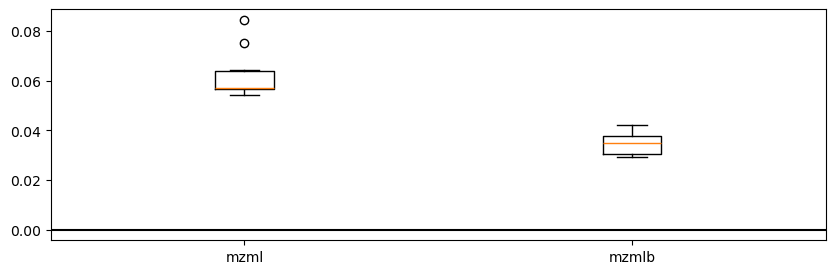

In [10]:
plt.boxplot([mzml_spec, mzmlb_spec], tick_labels=["mzml", "mzmlb"])
plt.axhline(y=0, color="k")
plt.show()

## Chromatogram extraction

In [15]:
mzml_chrom = timeit.repeat('get_chrom_mzml_pyteomics("../demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)
mzmlb_chrom = timeit.repeat('get_chrom_mzmlb("../demo_data/180205_Poo_TruePoo_Full1.mzMLb", 118.0865, 10)', globals=globals(), number=1, repeat=10)

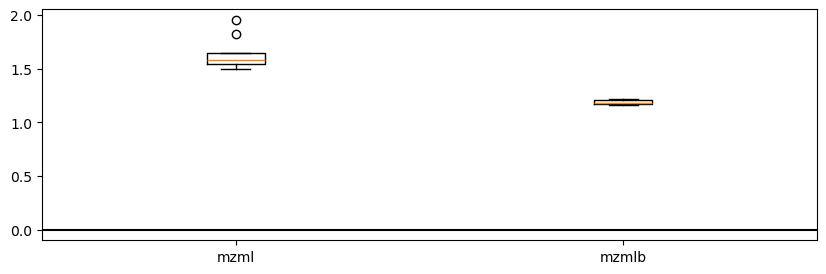

In [16]:
plt.boxplot([mzml_chrom, mzmlb_chrom], tick_labels=["mzml", "mzmlb"])
plt.axhline(y=0, color="k")
plt.show()